In [1]:
import pandas as pd
import numpy as np
import matplotlib as cm
import matplotlib.pyplot as plt
import pylab
import collections
import math
import os
import glob

In [2]:
os.chdir('..')
os.getcwd()

'C:\\Users\\aniru\\Desktop\\Amrita\\Sem 4\\Intelligence of Biological Systems\\Project\\CGR_for_Genome_Sequence'

# Functions

In [3]:
def count_kmers(sequence, k):
    d = collections.defaultdict(int)
    for i in range(len(data)-(k-1)):
        d[sequence[i:i+k]] +=1
    for key in d.copy().keys():
        if "N" in key:
            del d[key]
    return d

In [4]:
def probabilities(kmer_count, k):
    probabilities = collections.defaultdict(float)
    N = len(data)
    for key, value in kmer_count.items():
        probabilities[key] = float(value) / (N - k + 1)
    return probabilities

In [5]:
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = []
    for i in range(array_size):
        chaos.append([0]*array_size)
#     print(chaos)
    maxx = array_size
    maxy = array_size
    posx = 1
    posy = 1
    for key, value in probabilities.items():
        for char in key:
            if char == "T":
                posx += int(maxx / 2)
            elif char == "C":
                posy += int(maxy / 2)
            elif char == "G":
                posx += int(maxx / 2)
                posy += int(maxy / 2)
            maxx = maxx / 2
            maxy /= 2
#         print(posx,posy)
        chaos[posy-1][posx-1] = value
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
    
    return chaos

In [37]:
def scatterPlt(d):
#     x = [0]
#     y = [0]
#     for i in d:
#         if(i == 'A' or i == 'a'):
#             x11 = (x[-1]+1)/2
#             y11 = (y[-1]+1)/2
#             x.append(x11)
#             y.append(y11)
#         elif(i == 'T' or i == 't'):
#             x11 = (x[-1]-1)/2
#             y11 = (y[-1]+1)/2
#             x.append(x11)
#             y.append(y11)
#         elif(i == 'C' or i == 'c'):
#             x11 = (x[-1]-1)/2
#             y11 = (y[-1]-1)/2
#             x.append(x11)
#             y.append(y11)
#         elif(i == 'G' or i == 'g'):
#             x11 = (x[-1]+1)/2
#             y11 = (y[-1]-1)/2
#             x.append(x11)
#             y.append(y11)
#     return x,y
    
    x = [0.5]
    y = [0.5]
    for i in d:
        if(i == 'A' or i == 'a'):
            x11 = (x[-1]+0)/2
            y11 = (y[-1]+0)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'T' or i == 't'):
            x11 = (x[-1]+1)/2
            y11 = (y[-1]+1)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'C' or i == 'c'):
            x11 = (x[-1]+0)/2
            y11 = (y[-1]+1)/2
            x.append(x11)
            y.append(y11)
        elif(i == 'G' or i == 'g'):
            x11 = (x[-1]+1)/2
            y11 = (y[-1]+0)/2
            x.append(x11)
            y.append(y11)
    return x,y

In [7]:
def get_csv(path, fileName):
    print(fileName)
    fileName+=".csv"
    data = pd.read_csv(path+'\\'+fileName, header=None)
    return data

In [8]:
def select_Data(SeqCleaned, SequenceData, famName):
    print('Options:')
    a1 = list(SequenceData[famName][0])
    for i in a1:
        print(i)
    inp = input()
    data = SeqCleaned[famName].loc[inp][1]
    return data

In [9]:
def plotAll(SeqCleaned, SequenceData, famName, nums=5):
    a1 = list(SequenceData[famName][0])
    ctr = 0
    if(nums < len(a1)):
        for i in a1:
            if(ctr == nums):
                return len(a1)
            inp = i
            data = SeqCleaned[famName].loc[inp][1]
            x,y = scatterPlt(data)
            plt.figure(figsize=(7,7))
            plt.scatter(x,y)
            plt.title(i)
            ctr += 1
    else:
        for i in a1:
            inp = i
            data = SeqCleaned[famName].loc[inp][1]
            x,y = scatterPlt(data)
            plt.scatter(x,y)
            plt.title(i)
            plt.figure()
    return len(a1)

# Covid USA Data CGR

In [10]:
path = os.path.join(os.getcwd(), 'Data', 'BetaCoV_USA.txt')
with open(path) as f:
    data = f.readlines()

In [11]:
data = data[0]

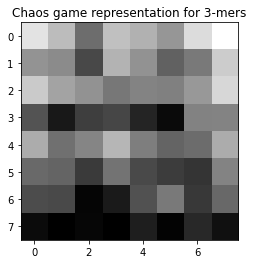

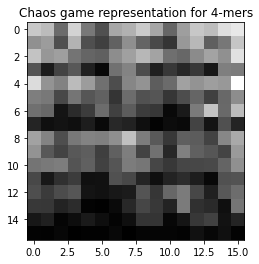

In [12]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# Covid Wuhan Data CGR

In [13]:
path = os.path.join(os.getcwd(), 'Data', 'BetaCoV_Wuhan.txt')
with open(path) as f:
    data = f.readlines()

In [14]:
data = data[0]

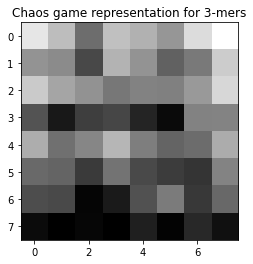

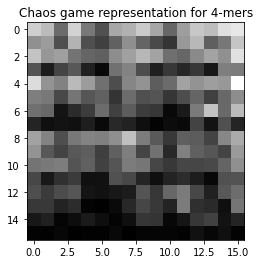

In [15]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# NC_012920 Data CGR
Homo sapiens mitochondrion, complete genome

In [16]:
path = os.path.join(os.getcwd(), 'Data', 'NC_012920.txt')
with open(path) as f:
    data = f.readlines()

In [17]:
ctr = 0
data1 = []
for i in data:
    data1.extend([i[0:-1]])
    ctr += 1
data = ""
for i in data1:
    data += i
data = data.upper()

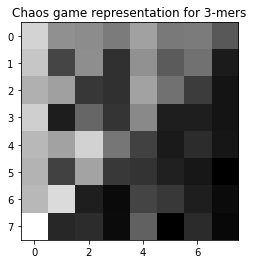

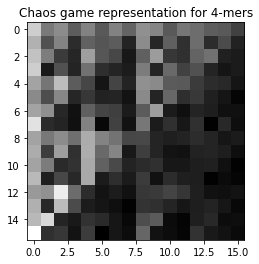

In [18]:
f3 = count_kmers(data, 3)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 3)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 3)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=plt.gray())
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=plt.gray())
pylab.show()

# Scatter plot

T   A<br>
C   G

C   G<br>
A   T

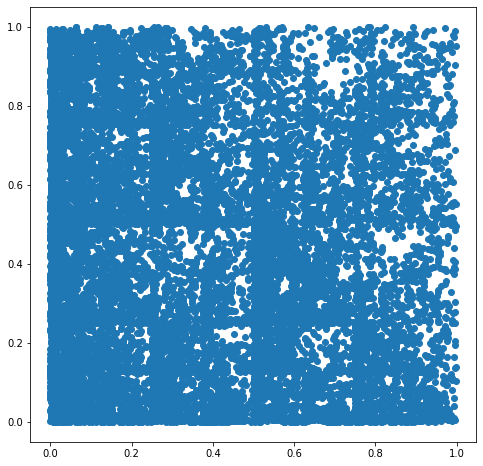

In [19]:
x,y = scatterPlt(data)
plt.figure(figsize=(8,8))
plt.scatter(x,y)

# Data Congruence <br> Reading all the Sequence data into a dictionary

In [20]:
path = os.path.join(os.getcwd(), 'Sequence_Data')
os.chdir(path)
extension = 'csv'
result = glob.glob('*.{}'.format(extension))
csvFileNames = [names.split('.')[0] for names in result]

In [21]:
os.chdir('..')
os.getcwd()

'C:\\Users\\aniru\\Desktop\\Amrita\\Sem 4\\Intelligence of Biological Systems\\Project\\CGR_for_Genome_Sequence'

In [22]:
path1 = os.path.join(os.getcwd(), 'Sequence_Data')

In [23]:
SequenceData = {csvFileName:get_csv(path1,csvFileName) for csvFileName in csvFileNames}

2019-nCoV
Adenoviridae
Alphacoronavirus
Alphacoronavirus1
Anelloviridae
Betacoronavirus
Betacoronavirus2
Betaflexiviridae
Bromoviridae
Calciviridae
Caudovirales
Coronaviridae
Deltacoronavirus
Deltacoronavirus3
Embecovirus
Embecovirus1
Flaviviridae
Gammacoronavirus
Geminiviridae
Genomoviridae
Merbecovirus
Merbecovirus1
Microviridae
Nobecovirus
Nobecovirus1
Ortervirales
Papillomaviridae
Parvoviridae
Peribunyaviridae
Phenuiviridae
Picornaviridae
Polydnaviridae
Polyomaviridae
Potyviridae
Reoviridae
Rhabdoviridae
Riboviria
Sarbecovirus
Sarbecovirus1
Sarbecovirus2
Secoviridae


In [24]:
SeqCleaned = {}
for key in SequenceData.keys():
    SeqCleaned[key] = SequenceData[key].set_index(0)

In [25]:
data = select_Data(SeqCleaned, SequenceData, 'Reoviridae')

Options:
AF389452.1 Lymantria dispar cypovirus 14 segment 1, complete sequence
AF389453.1 Lymantria dispar cypovirus 14 segment 2, complete sequence
AF389454.1 Lymantria dispar cypovirus 14 segment 3, complete sequence
AF389455.1 Lymantria dispar cypovirus 14 segment 4, complete sequence
AF389456.1 Lymantria dispar cypovirus 14 segment 5, complete sequence
AF389462.1 Lymantria dispar cypovirus 1 segment 1, complete sequence
AF389463.1 Lymantria dispar cypovirus 1 segment 2, complete sequence
AF389464.1 Lymantria dispar cypovirus 1 segment 3, complete sequence
AF389465.1 Lymantria dispar cypovirus 1 segment 4, complete sequence
AF389466.1 Lymantria dispar cypovirus 1 segment 5, complete sequence
AM498051.2 Bluetongue virus 8 complete viral segment 1
AM498052.2 Bluetongue virus 8 complete viral segment 2
AM498053.1 Bluetongue virus 8 complete viral segment 3
AM744987.1 Epizootic hemorrhagic disease virus (serotype 2 / strain 439) segment 1
AM744988.1 Epizootic hemorrhagic disease virus (

NC_043370.1 Diadromus pulchellus reovirus ORF1


Text(0.5, 1.0, 'NC_043370.1 Diadromus pulchellus reovirus ORF1')

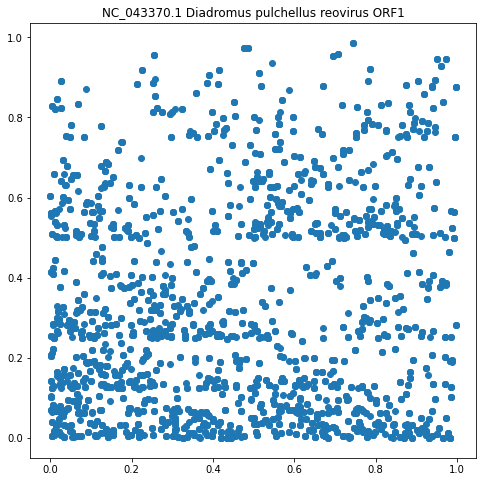

In [27]:
# NC_043370.1 Diadromus pulchellus reovirus ORF1
x,y = scatterPlt(data)
plt.figure(figsize=(8,8))
plt.scatter(x,y)
plt.title('NC_043370.1 Diadromus pulchellus reovirus ORF1')

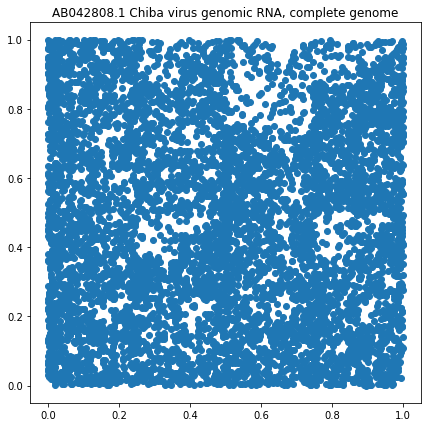

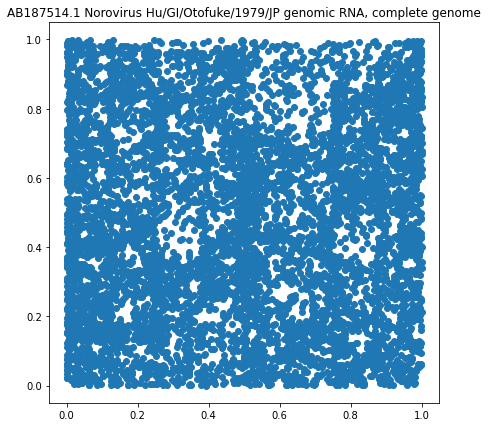

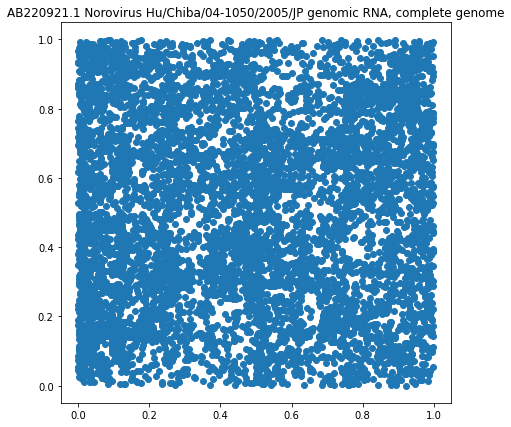

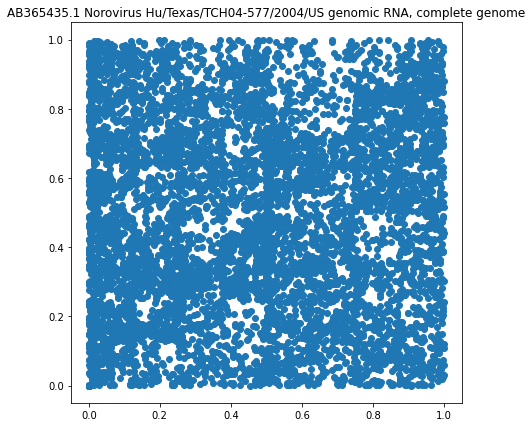

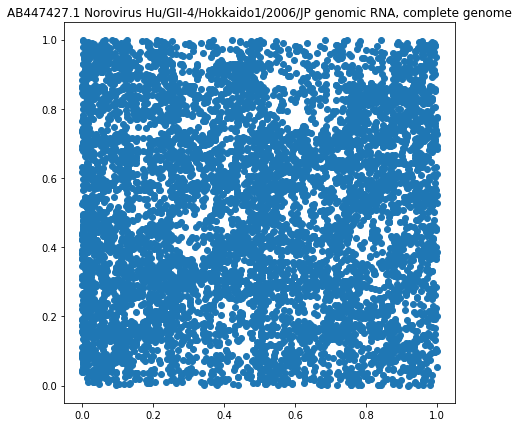

In [28]:
ll = plotAll(SeqCleaned, SequenceData, 'Calciviridae')

# Mus musculus chromosome X clones MP1-C03180, MP1-C22301, CT7-374D15, proximal part, complete sequence

In [29]:
path = os.path.join(os.getcwd(), 'Data', 'AF125314.2.txt')
with open(path) as f:
    data = f.readlines()

In [30]:
data = data

In [31]:
aa = ""
for i in data:
    aa += i[:-1]

In [32]:
data = aa

In [34]:
data = "ATGGTG"

C   T<br>
A   G

(0.0, 1.0)

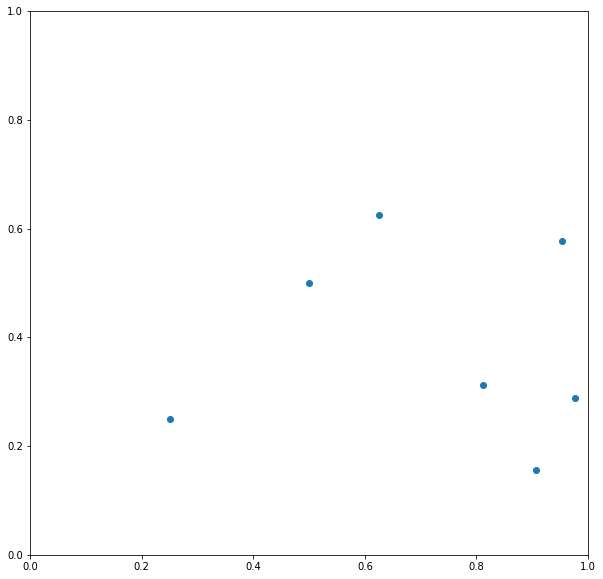

In [38]:
x,y = scatterPlt(data)
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlim([0, 1])
plt.ylim([0, 1])

# Length between 2 sequences